In [ ]:
# Creating data set

# A
a =[0, 0, 1, 1, 0, 0,
   0, 1, 0, 0, 1, 0,
   1, 1, 1, 1, 1, 1,
   1, 0, 0, 0, 0, 1,
   1, 0, 0, 0, 0, 1]
# B
b =[0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 1, 0]
# C
c =[0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 1, 1, 1, 0]

# Creating labels
y =[[1, 0, 0],
   [0, 1, 0],
   [0, 0, 1]]


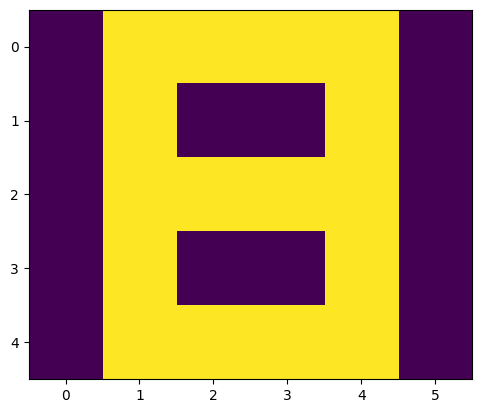

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# visualizing the data, plotting A.
plt.imshow(np.array(b).reshape(5, 6))
plt.show()

In [ ]:
# converting data and labels into numpy array
x =[np.array(a).reshape(1, 30), np.array(b).reshape(1, 30),
                                np.array(c).reshape(1, 30)]
y = np.array(y)
# Printing data and labels
print(x, "\n\n", y)

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


In [ ]:
# activation function
def sigmoid(x):
	return(1/(1 + np.exp(-x)))

# Creating the Feed forward neural network
def f_forward(x, w1, w2):
	# hidden
	z1 = x.dot(w1)    # input from layer 1
	a1 = sigmoid(z1)  # out put of layer 2
	z2 = a1.dot(w2)   # input of out layer
	a2 = sigmoid(z2)  # output of out layer
	return(a2)

# initializing the weights randomly
def generate_wt(x, y):
	li =[]
	for i in range(x * y):
		li.append(np.random.randn())
	return(np.array(li).reshape(x, y))

# for loss we will be using mean square error(MSE)
def loss(out, Y):
	s =(np.square(out-Y))
	s = np.sum(s)/len(y)
	return(s)

# Back propagation of error
def back_prop(x, y, w1, w2, alpha):

	# hidden layer
	z1 = x.dot(w1)
	a1 = sigmoid(z1)
	# output layer
	z2 = a1.dot(w2)
	a2 = sigmoid(z2)

	# error in output layer
	d2 =(a2-y)
	# error in hidden layer
	d1 = np.multiply((w2.dot((d2.transpose()))).transpose(),
								(np.multiply(a1, 1-a1)))
	# Gradient for w1 and w2
	w1_adj = x.transpose().dot(d1)
	w2_adj = a1.transpose().dot(d2)

	# Updating parameters
	w1 = w1-(alpha*(w1_adj))
	w2 = w2-(alpha*(w2_adj))

	return(w1, w2)


| Step               | Formula                                      | Meaning                                  |
| ------------------ | -------------------------------------------- | ---------------------------------------- |
| Output error       | $$d_2 = a_2 - y$$                              | Difference between prediction and target |
| Hidden layer error | $$d_1 = (d_2 \cdot w_2^T) \circ a_1(1 - a_1)$$ | Push error back with sigmoid derivative  |
| Gradient for w2    | $$\Delta w_2 = a_1^T \cdot d_2$$               | How much to change w2                    |
| Gradient for w1    | $$\Delta w_1 = x^T \cdot d_1$$                 | How much to change w1                    |
| Update rule        | $$w = w - \alpha \cdot \Delta w$$              | Adjust weights to reduce error           |



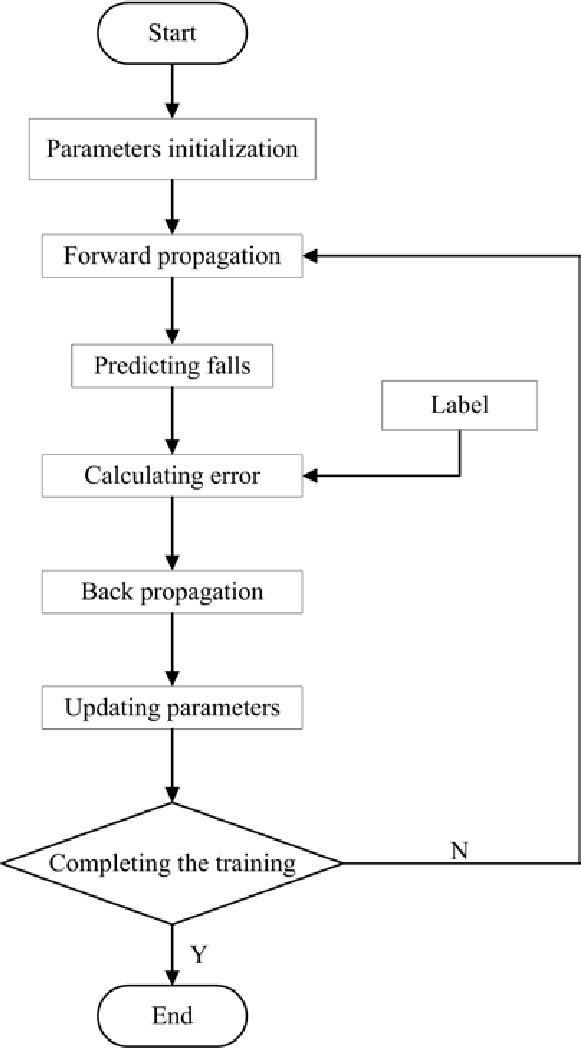

In [ ]:
# initializing Weights
w1 = generate_wt(30, 5)
w2 = generate_wt(5, 3)

print(w1, "\n\n", w2)

[[-1.79242049 -0.5830969  -0.44655641 -0.88695898 -0.26952672]
 [ 1.15693899 -1.12164775  0.49764126 -0.36514617 -0.10215914]
 [ 0.84669519 -0.89135469 -0.94231771 -0.88540597 -0.77226145]
 [ 0.63478153 -0.3981902   0.92872086  0.6205759   0.5731597 ]
 [ 1.38717801 -0.13266038  0.5839506  -0.88479203  0.07256995]
 [ 0.46929678 -0.03257574 -0.95072211 -1.55485247  0.90796058]
 [ 0.14831499 -0.27089383 -0.02248922  1.17988869 -1.02586866]
 [ 0.57289743 -1.11443842  0.57070336 -1.22386162  0.95614967]
 [ 0.27184116  0.60691487  0.85227666 -0.27073042  0.60755399]
 [-0.17838574  0.05802316 -0.28056718 -0.6097578  -0.21894289]
 [ 0.22017691 -1.18223757 -0.52649091 -0.03734455  1.82057779]
 [ 0.11813922  0.23176166 -0.45782759 -1.01146155 -1.16217358]
 [-1.34717722  0.31614016  1.19109931  0.28195342  0.3620022 ]
 [ 0.3743848  -1.19830757 -0.47306179  0.50108849  0.99097676]
 [-0.07571435 -0.66756816  1.29052066 -0.93113659 -0.44623009]
 [-0.01511647  1.00226145 -1.34853994  0.28109508  0.03

In [ ]:
# training model
def train(x, Y, w1, w2, alpha = 0.01, epoch = 10):
	acc =[]
	losss =[]
	for j in range(epoch):
		l =[]
		for i in range(len(x)):
			out = f_forward(x[i], w1, w2)
			l.append((loss(out, Y[i])))
			w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
		print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(l)))*100)
		acc.append((1-(sum(l)/len(l)))*100)
		losss.append(sum(l)/len(x))
	return(acc, losss, w1, w2)

acc, losss, w1, w2 = train(x, y, w1, w2, 0.1, 1000)

epochs: 1 ======== acc: 86.50513328413072
epochs: 2 ======== acc: 86.54468326724995
epochs: 3 ======== acc: 86.58356913409135
epochs: 4 ======== acc: 86.62181186591408
epochs: 5 ======== acc: 86.65943231854335
epochs: 6 ======== acc: 86.69645123042984
epochs: 7 ======== acc: 86.73288923310106
epochs: 8 ======== acc: 86.76876686405774
epochs: 9 ======== acc: 86.80410458218802
epochs: 10 ======== acc: 86.83892278579404
epochs: 11 ======== acc: 86.87324183334944
epochs: 12 ======== acc: 86.90708206713347
epochs: 13 ======== acc: 86.94046383991777
epochs: 14 ======== acc: 86.97340754491536
epochs: 15 ======== acc: 87.00593364924009
epochs: 16 ======== acc: 87.03806273116761
epochs: 17 ======== acc: 87.06981552153799
epochs: 18 ======== acc: 87.10121294969497
epochs: 19 ======== acc: 87.13227619442094
epochs: 20 ======== acc: 87.16302674039724
epochs: 21 ======== acc: 87.19348644080289
epochs: 22 ======== acc: 87.22367758675811
epochs: 23 ======== acc: 87.25362298442771
epochs: 24 ======== 

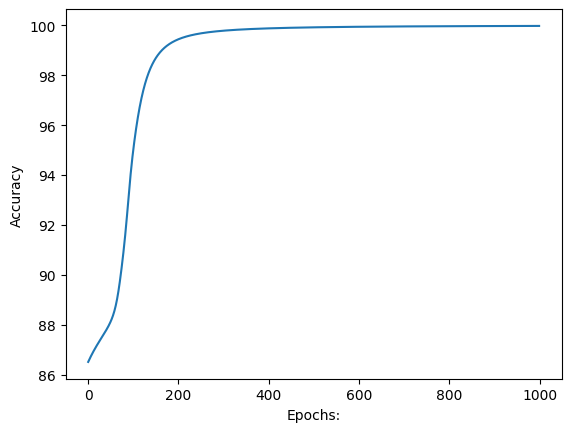

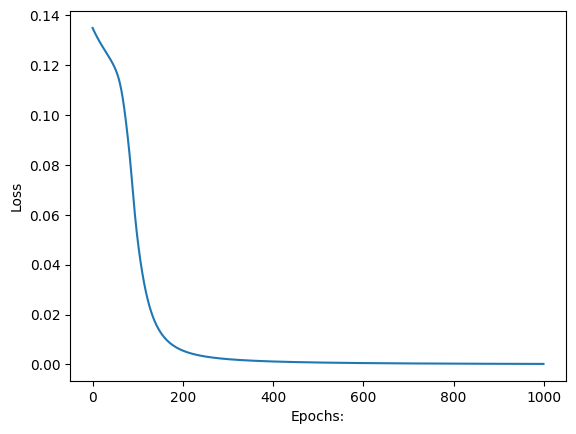

In [ ]:
import matplotlib.pyplot as plt1

# plotting accuracy
plt1.plot(acc)
plt1.ylabel('Accuracy')
plt1.xlabel("Epochs:")
plt1.show()

# plotting Loss
plt1.plot(losss)
plt1.ylabel('Loss')
plt1.xlabel("Epochs:")
plt1.show()

Image is of letter A.


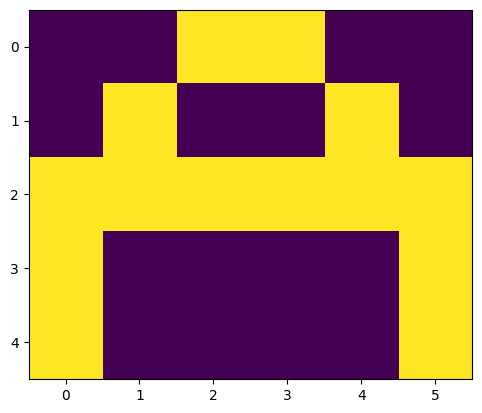

Image is of letter A.


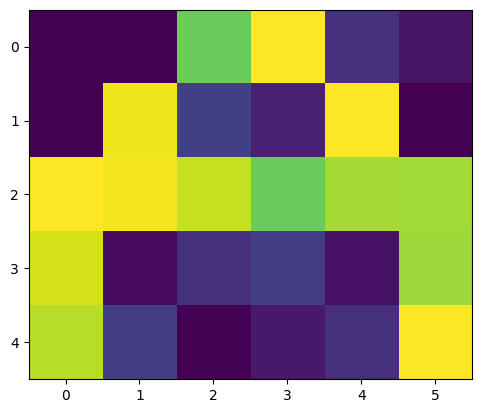

In [ ]:
# making prediction
def predict(x, w1, w2):
	Out = f_forward(x, w1, w2)
	maxm = 0
	k = 0
	for i in range(len(Out[0])):
		if(maxm<Out[0][i]):
			maxm = Out[0][i]
			k = i
	if(k == 0):
		print("Image is of letter A.")
	elif(k == 1):
		print("Image is of letter B.")
	else:
		print("Image is of letter C.")
	plt.imshow(x.reshape(5, 6))
	plt.show()
# Example: Predicting for letter 'B'
predict(x[0], w1, w2)

# adding noise and predicting
def add_noise(image, noise_factor=0.2):
    # Generate random noise
    noise = np.random.normal(loc=0.0, scale=noise_factor, size=image.shape)
    # Add noise to the image
    noisy_image = image + noise
    # Clip the values to be in the range [0, 1]
    noisy_image = np.clip(noisy_image, 0, 1)
    return noisy_image

# Predicting for letter 'B' with noise
predict(add_noise(x[0]), w1, w2)